In [38]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st

In [39]:
mouse_base = "Resources/Mouse_metadata.csv"
mouse_data = pd.read_csv(mouse_base)
study_base = "Resources/Study_results.csv"
study_data = pd.read_csv(study_base)

In [40]:
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [41]:
study_data   

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
combined_data = pd.merge(mouse_data,study_data, on = "Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
combined_data['Drug Regimen'].nunique()

10

In [7]:
dup_mouse_count = pd.DataFrame(combined_data.groupby('Mouse ID').count())
dup_mouse_count = dup_mouse_count.reset_index()
dup_mouse_count = dup_mouse_count.sort_values('Timepoint', ascending = False)
dup_mouse = dup_mouse_count.iloc[0,0]
dup_mouse_info = combined_data.loc[combined_data['Mouse ID'] == dup_mouse]
dup_mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
combined_data = combined_data.loc[combined_data['Mouse ID'] != dup_mouse]
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
combined_data['Tumor Volume (mm3)'] = combined_data['Tumor Volume (mm3)'].apply(pd.to_numeric)
drug_mid = combined_data.groupby('Drug Regimen')

tumors = drug_mid['Tumor Volume (mm3)']

drug_mean = tumors.mean()
drug_median = tumors.median()
drug_var = tumors.var()
drug_std = tumors.std()
mice_count = drug_mid['Mouse ID'].count()

data_summ = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Variation': drug_var, 'Standard Deviation': drug_std, 'Mice Count': mice_count})
data_summ

<ipython-input-9-10faaa17438b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Tumor Volume (mm3)'] = combined_data['Tumor Volume (mm3)'].apply(pd.to_numeric)


,Mean,Median,Variation,Standard Deviation,Mice Count
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,178
Infubinol,52.884795,51.820584,43.128684,6.567243,178
Ketapril,55.235638,53.698743,68.553577,8.279709,188
Naftisol,54.331565,52.509285,66.173479,8.134708,186
Placebo,54.033581,52.288934,61.168083,7.821003,181
Propriva,52.320930,50.446266,43.852013,6.622085,148
Ramicane,40.216745,40.673236,23.486704,4.846308,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,181


([<matplotlib.axis.XTick at 0x21ccd83b100>,
 [Text(0, 0, "['Capomulin']"),
  Text(1, 0, "['Ceftamin']"),
  Text(2, 0, "['Infubinol']"),
  Text(3, 0, "['Ketapril']"),
  Text(4, 0, "['Naftisol']"),
  Text(5, 0, "['Placebo']"),
  Text(6, 0, "['Propriva']"),
  Text(7, 0, "['Ramicane']"),
  Text(8, 0, "['Stelasyn']"),
  Text(9, 0, "['Zoniferol']")])

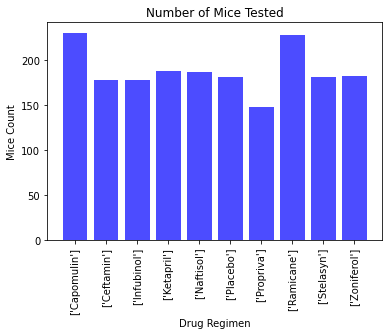

In [10]:
x_axis = np.arange(len(drug_mid['Drug Regimen']))

plt.bar(x_axis,mice_count,color = "b", alpha = 0.7, align = 'center')
plt.title("Number of Mice Tested")
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
tick_locs = [value for value in x_axis]
plt.xticks(x_axis, drug_mid['Drug Regimen'].unique(), rotation = 'vertical')

Text(0, 0.5, 'Mice Count')

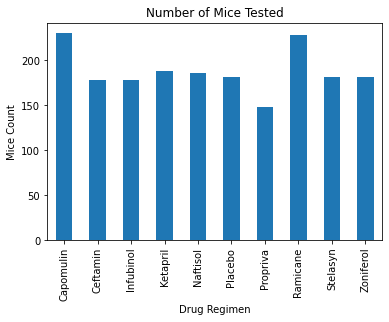

In [11]:
drug_bar = mice_count.plot(kind = 'bar', title = 'Number of Mice Tested')
drug_bar.set_ylabel('Mice Count')

In [12]:
gender_df = combined_data.groupby('Sex')
gender_num = gender_df['Drug Regimen'].count()
gender_fin = pd.DataFrame({'Gender Count': gender_num})
gender_fin

,Gender Count
Sex,
Female,922
Male,958


Text(0.5, 1.0, 'Gender Ditribution')

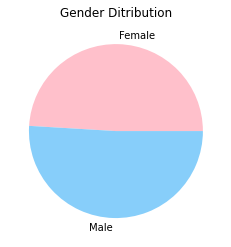

In [13]:
labels = ['Female','Male']
colors = ['pink','lightskyblue']
plt.pie(gender_fin['Gender Count'], labels = labels, colors = colors)
plt.title('Gender Ditribution')

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel=' '>

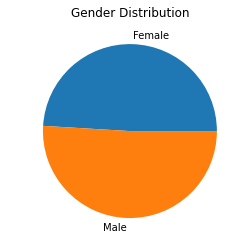

In [14]:
gender_pie = gender_num.plot(kind = 'pie', title = 'Gender Distribution')
gender_pie.set_ylabel(' ')
gender_pie

In [67]:
stats_df = study_data.sort_values(by = ['Mouse ID','Timepoint'])
stats_df = stats_df.reset_index()
stats_df = stats_df.drop_duplicates(subset = ['Mouse ID'], keep = 'last')
stats_df = stats_df.reset_index()
new_stats = pd.merge(stats_df, mouse_data, on = 'Mouse ID')
new_stats.drop(['index', 'level_0'], axis = 1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [89]:
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_plotting = {}
for drug in drug_list:
    tumor_stats = new_stats.loc[new_stats['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_plotting[drug] = tumor_stats

capomulin = pd.DataFrame({'Capomulin': tumor_plotting['Capomulin']}).reset_index().drop(['index'], axis = 1)
ramicane = pd.DataFrame({'Ramicane': tumor_plotting['Ramicane']}).reset_index().drop(['index'], axis = 1)
infubinol = pd.DataFrame({'Infubinol': tumor_plotting['Infubinol']}).reset_index().drop(['index'], axis = 1)
ceftamin = pd.DataFrame({'Ceftamin': tumor_plotting['Ceftamin']}).reset_index().drop(['index'], axis = 1)

new_tumor = pd.DataFrame({'Capomulin': capomulin['Capomulin'],
                          'Ramicane': ramicane['Ramicane'],
                          'Infubinol': infubinol['Infubinol'],
                          'Ceftamin': ceftamin['Ceftamin']})
new_tumor.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


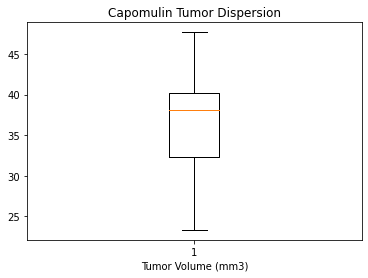

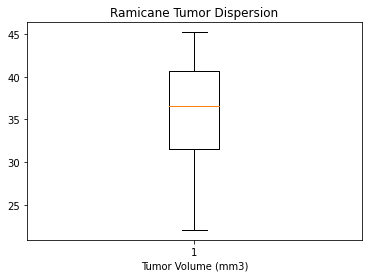

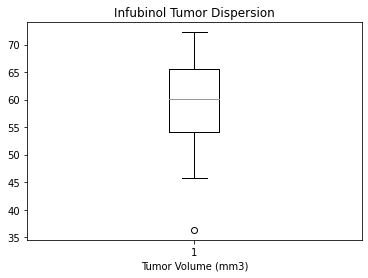

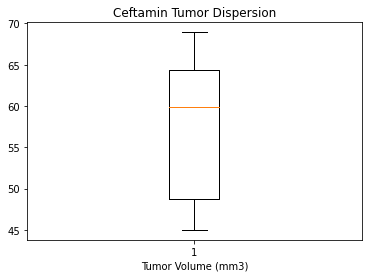

In [99]:
for drug in drug_list:
    fig1, ax1 = plt.subplots()
    ax1.set_title(f"{drug} Tumor Dispersion")
    ax1.set_xlabel('Tumor Volume (mm3)')
    ax1.boxplot(new_tumor[drug])
    plt.show()
    

In [104]:
for drug in drug_list:
    quartiles = new_tumor[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{drug}")
    print(f"The lower quartile is: {round(lowerq,2)}")
    print(f"The upper quartile is: {round(upperq,2)}")
    print(f"The interquartile range is: {round(iqr,2)}")
    print(f"The the median is: {round(quartiles[0.5],2)} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    print("---------------------------------------------------")

Capomulin
The lower quartile is: 32.38
The upper quartile is: 40.16
The interquartile range is: 7.78
The the median is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
---------------------------------------------------
Ramicane
The lower quartile is: 31.56
The upper quartile is: 40.66
The interquartile range is: 9.1
The the median is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
---------------------------------------------------
Infubinol
The lower quartile is: 54.05
The upper quartile is: 65.53
The interquartile range is: 11.48
The the median is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
---------------------------------------------------
Ceftamin
The lower quartile is: 48.72
The upper quartile is: 64.3
The interquartile range is: 15.58
The the median is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
-----------------------------------

In [109]:
outlier_df = combined_data.loc[combined_data['Drug Regimen'] == 'Infubinol']
outlier_fin = outlier_df.loc[outlier_df['Tumor Volume (mm3)'] < 36.83]
outlier_fin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


<AxesSubplot:title={'center':'s185 Tumor Info'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

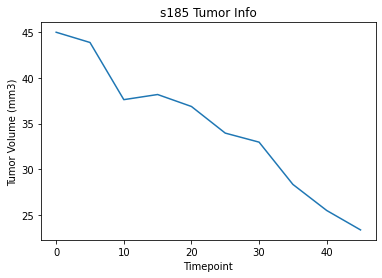

In [16]:
mouse_name = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[0]
mouse_info = combined_data.loc[combined_data['Mouse ID'] == mouse_name][['Timepoint','Tumor Volume (mm3)']]
mouse_info.index = mouse_info['Timepoint']
mouse_plot = mouse_info['Tumor Volume (mm3)'].plot.line(title = f"{mouse_name} Tumor Info")
mouse_plot.set_ylabel('Tumor Volume (mm3)')
mouse_plot

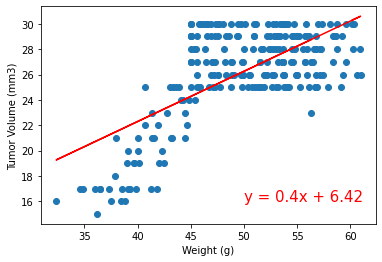

The regression model for this is: y = 0.4x + 6.42.
The r-sqared value is: 0.44.


In [58]:
scatter_start = combined_data.groupby('Mouse ID')
tumor_avg = scatter_start['Weight (g)'].mean()
weight_avg = scatter_start['Tumor Volume (mm3)'].mean()
scatter_df = pd.DataFrame({'Weight': weight_avg,'Tumor Vol': tumor_avg})
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_avg, tumor_avg)
regress_values = weight_avg * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(weight_avg, tumor_avg)
plt.plot(weight_avg, regress_values, 'r-')
plt.annotate(line_eq, (50,16), fontsize = 15, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


print(f"The regression model for this is: {line_eq}.")
print(f"The r-sqared value is: {round(rvalue**2,2)}.")

In [60]:
correlation = st.pearsonr(weight_avg,tumor_avg)

print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

The correlation between weight and tumor volume is 0.66
